<a href="https://colab.research.google.com/github/adrianphilo/finance/blob/main/de/equbotic/finance/financeBas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import importlib
import financeBas as fiB
importlib.reload(fiB)

<module 'financeBas' from '/content/financeBas.py'>

**DF_ofCash**(cashRate, days, base) >> $DF = \frac 1 { 1 + cashRate * \frac{days} {base} } $  




In [3]:
print ( fiB.DF_ofCash(0.02,  60, 360) )
print ( fiB.DF_ofCash(0.04, 120, 365) )
help(fiB.DF_ofCash)

0.9966777408637874
0.9870200108166577
Help on function DF_ofCash in module financeBas:

DF_ofCash(cashRate, days, base)
    returns the Discountfactor for a CashRate
    :param cashRate: the Cash Interestrate to be converted as a Factor
    :param days: the number of days in the period
    :param base: the DayCountBase of the Rate (e.g. 360 or 365)
    :return: the DiscountFactor at the end of the period



**ZeroRate_ofDF**(df, days) >> $ZeroRate = \frac {-LOGn(df)} { \frac{days} {365} } = \frac {365}{days} * LOGn ( \frac {1}{df} ) $  

In [4]:
print ( fiB.ZeroRate_ofDF(0.996,  60) )
print ( fiB.ZeroRate_ofDF(0.987, 120) )
help(fiB.ZeroRate_ofDF)

0.024382130168361167
0.039800936960493756
Help on function ZeroRate_ofDF in module financeBas:

ZeroRate_ofDF(df, days)
    returns the continously compounded ZeroRate for a DiscountFactor (as Factor on Base 365)
    :param DiscountFactor: to be converted
    :param days: the number of days in the period
    :return: the ZeroRate for the period



**PV_ofCoupon(0.03, 5)** >> $ PresentValue (FaceVal:1) = \sum {\frac {cpn}{(1+cpn)^{yr}}} + \frac {1}{(1+cpn)^{years}} $



In [19]:
print ( fiB.PV_ofCoupon(0.03, 5) )
print ( fiB.PV_ofCoupon(0.04, 10) )
help  ( fiB.PV_ofCoupon )

0.9661218385102635
0.9187672696030861
Help on function PV_ofCoupon in module financeBas:

PV_ofCoupon(cpn, years)
    calcs the PresentValue of a fixed Coupon Cashflow
    :param cpn: the coupon 
    :param years: Maturity in Years
    :return: the present value



In [34]:
def addRateToCurve(dates, dfs, zeros, cashRate, days, base, fwdstart):
  """adds a rate or forward rate to the curve (lists of dates, dfs, zeros)
  """
  df   = fiB.DF_ofCash(cashRate, days, base)
  if (fwdstart > 0):
    ii = dates.index(fwdstart)
    df = df * dfs[ii]

  days0 = days + fwdstart
  zero  = fiB.ZeroRate_ofDF(df, days0)

  dates.append( days0 ) 
  dfs  .append( df )  
  zeros.append( zero )


In [39]:
def addParCpnToCurve(dates, dfs, zeros, cpn, years, mtrdays, lastcpndays):
  """ adds a ParCoupon Rate (SwapRate) ro the curve. 
      only yearly and the last cpn date must be known and in the curve.
      swap starts at spot date.
      :param lastcpndays: ist the days from today to coupondate before matirity
  """
  pv_spot = fiB.PV_ofCoupon(cpn, years)
  ii_spot = dates.index(2)
  print("pv_spot ",pv_spot)
  pv = pv_spot * dfs[ii_spot]   #present value at today
  print("pv ",pv)

  ii_lastcpn = dates.index(lastcpndays)
  df_lastcpn = dfs[ii_lastcpn]     #df at lastcpn date
  print("df_lastcpn ",df_lastcpn)
  pv_lastcpn = pv / df_lastcpn  #pf updisc. ro last cpn date
  print("pv_lastcpn ",pv_lastcpn) 

  df_lastprd = 1 / (1+cpn)      #df for last cpn for 1 year
  print("df_lastprd ",df_lastprd)

  df_mtr = df_lastprd * df_lastcpn
  print("df_mtr ",df_mtr) 

  zero  = fiB.ZeroRate_ofDF(df_mtr, mtrdays)

  dates.append( mtrdays ) 
  dfs  .append( df_mtr )  
  zeros.append( zero )


In [40]:
CurveDates = list()
CurveDFs   = list()
CurveZeros = list()

addRateToCurve  (CurveDates, CurveDFs, CurveZeros, 0.02,      1, 360, 0)   #O/N
addRateToCurve  (CurveDates, CurveDFs, CurveZeros, 0.02,      1, 360, 1)   #T/N
addRateToCurve  (CurveDates, CurveDFs, CurveZeros, 0.02,      1, 360, 2)   #S/N
addRateToCurve  (CurveDates, CurveDFs, CurveZeros, 0.024,   365, 360, 2)   #S/N

addParCpnToCurve(CurveDates, CurveDFs, CurveZeros, 0.03, 4, 730, 367)   #2yr swap

print(CurveDates)
print(CurveDFs)
CurveZeros

pv_spot  0.9684508822281006
pv  0.9683432855409934
df_lastcpn  0.9761362494117758
pv_lastcpn  0.9920165203623178
df_lastprd  0.970873786407767
df_mtr  0.9477050965162872
[1, 2, 3, 367, 730]
[0.9999444475306928, 0.9998888981474624, 0.9998333518501374, 0.9761362494117758, 0.9477050965162872]


[0.020277214527018462,
 0.020277214527019853,
 0.020277214527018715,
 0.02402147796823134,
 0.02685595237329397]

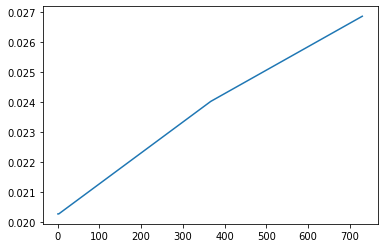

In [41]:
import matplotlib.pyplot as plt
plt.plot(CurveDates, CurveZeros)